In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.linalg.graphmatrix import adjacency_matrix
from networkx.linalg import laplacian_matrix
from scipy.optimize import minimize


In [5]:
gr = nx.random_graphs.fast_gnp_random_graph(10, 0.5)

In [6]:
gr1 = nx.complete_graph(5)
gr2 = nx.complete_graph(5)
graph = nx.disjoint_union(gr1,gr2)
graph.add_edge(0, 5)

In [8]:
def laplacian_eigenmaps(graph, A, m = 2):
    """
    Find laplacian eigenmap encoding of graph nodes simulating similarity measure in R^m space
    
    Keyword arguments:
    graph -- graph with n nodes describing node connections 
    A -- similarity function matrix - preferably sparse matrix
    m -- output dimension
    """
    n = len(graph.nodes)
    D = laplacian_matrix(graph) + adjacency_matrix(graph)
    L = D - A
    print(type(adjacency_matrix(graph)).__name__)
    Y0 = np.random.rand(n,m).reshape(-1)
    I = np.eye(m)
    flat = lambda f : lambda Y_flat : f(Y_flat.reshape(n,m)).reshape(-1)
    func = lambda Y: np.trace(Y.T @ L @ Y)
    der = lambda Y: (2 * L @ Y).reshape(-1)

    eq_cons = {"type": "eq",
              "fun": flat(lambda Y: np.sum((Y.T @ D @ Y - I)**2)),
              "jac": flat(lambda Y: 2 * D @ Y)}

    res = minimize(flat(func), 
                   Y0, 
                   method='SLSQP', 
                   jac=flat(der), 
                   constraints = [eq_cons], 
                   options={'ftol': 1e-9, 'disp': True, 'maxiter': 200})
    print(type(res).__name__)
    return res

In [ ]:
plt.figure(figsize=(16,10))
nx.draw(graph, with_labels = True, node_size = 1000, font_size = 24, font_color = "white")
labeldict = {node: str(node) for node in gr.nodes}

In [ ]:
type(res.x).__name__

In [11]:
res = laplacian_eigenmaps(graph, adjacency_matrix(graph), m = 2)
n, m = 10, 2
plt.figure(figsize = (16,10))
plt.scatter(res.x.reshape(n,m)[:,0], res.x.reshape(n,m)[:,1],s=1000)
for x, y, t in zip(list(res.x.reshape(n,m)[:,0]), list(res.x.reshape(n,m)[:,1]), list(graph.nodes)):
    plt.text(x, y, t, horizontalalignment='center', verticalalignment='center', 
             fontdict = {"size": 24, "color": "white"})

'ndarray'

csr_matrix
Iteration limit reached    (Exit mode 9)
            Current function value: [0.29860188]
            Iterations: 200
            Function evaluations: 1906
            Gradient evaluations: 200
OptimizeResult


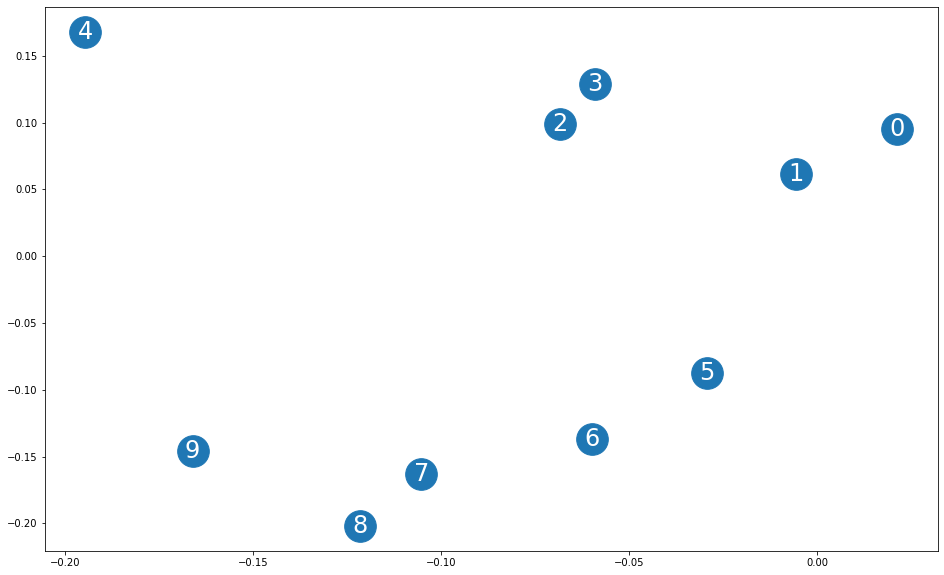

In [9]:
res = laplacian_eigenmaps(graph, adjacency_matrix(graph), m = 2)
n, m = 10, 2
plt.figure(figsize = (16,10))
plt.scatter(res.x.reshape(n,m)[:,0], res.x.reshape(n,m)[:,1],s=1000)
for x, y, t in zip(list(res.x.reshape(n,m)[:,0]), list(res.x.reshape(n,m)[:,1]), list(graph.nodes)):
    plt.text(x, y, t, horizontalalignment='center', verticalalignment='center', 
             fontdict = {"size": 24, "color": "white"})

In [ ]:
a = list(graph.edges)
np.random.shuffle(a)

In [ ]:
n, m = 10,2
Z = np.zero(n,m).reshape(-1)

In [ ]:
np.zeros((n,m))

In [ ]:
def graph_factorization(graph, A, m=5, eps=1e-7, lmbd=0):
    """
    Find graph factorization encoding of graph nodes simulating similarity measure in R^m space
    
    Keyword arguments:
    graph -- graph with n nodes describing node connections 
    A -- similarity function matrix - preferably sparse matrix
    m -- output dimension
    """
    n = len(graph.nodes)
    Z = np.random.rand(n,m)
    t = 1
    while True:
        Zprev = np.copy(Z)
        edges = list(graph.edges)
        np.random.shuffle(edges)
        for i, j in edges:
            eta = 1/np.sqrt(t)
            t+=1
            Z[i,] = Z[i,] + eta*((A[i,j]-np.dot(Z[i,],Z[j,]))*Z[j,] - lmbd*Z[i,])
            t+=1
            Z[j,] = Z[j,] + eta*((A[i,j]-np.dot(Z[i,],Z[j,]))*Z[i,] - lmbd*Z[j,])
        error = np.sum((Z - Zprev)**2)
        print(error, end = "\r")
        if error < eps:
            break
    return Z

In [ ]:
Z @ Z.T

In [ ]:
Z = graph_factorization(graph, adjacency_matrix(graph))

In [ ]:
adjacency_matrix(graph).todense()

In [ ]:
Z = graph_factorization(graph, adjacency_matrix(graph))
res = Z
n, m = 10, 2
plt.figure(figsize = (16,10))
plt.scatter(Z[:,0], Z[:,1],s=1000)
for x, y, t in zip(list(Z[:,0]), list(Z[:,1]), list(graph.nodes)):
    plt.text(x, y, t, horizontalalignment='center', verticalalignment='center', 
             fontdict = {"size": 24, "color": "white"})

In [ ]:
np.round(Z @ Z.T, decimals = 1)